- # Exercici 1


Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. 
Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

### 1.1 Descarrega i exploració del Dataset ###

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from IPython.display import Image



In [3]:
# Llegeixo el dataframe
lligues = pd.read_csv('/Users/angelssastrenadal/Downloads/ITAcademy_Exercicis/LligueseuropeesUEFA.csv',sep=";", encoding='Windows-1252')
lligues.sort_values(by='Pts', ascending=False) #Ordeno per punts i veig que coincideix amb el Ranking


,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
5,6,Milan,ITA,1,37,25,8,4,66,31,...,83,2.24,60.0,34.4,25.6,0.69,W W W W W,42388,Rafael Leão - 11,Mike Maignan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,...,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
94,95,Venezia,ITA,20,37,6,8,23,34,69,...,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
95,96,Watford,ENG,19,37,6,5,26,33,75,...,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster
96,97,Norwich City,ENG,20,37,5,7,25,23,79,...,22,0.59,33.0,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11,Tim Krul


In [4]:
lligues.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

Veig que son 98 files i 20 variables i que no hi ha nulls perque totes les variables tenen (98 non-null) dades.
Hi ha nombres (int64 i float64) i objectes.
Significat de les variables:
    
- Rk = Ranking
- Squad = Team squad
- Country
- LgRk = League Ranking
- MP = Match played
- W = Wins
- D = Draws
- L = Lost
- GF = Goals favor
- GA = Goals against
- GD = Goals difference
- Pts = Points
- Pts/G = Points/game
- xG = Expected goals
- xGA = Expected goals against
- xGD = Expected goals difference  =(Expected goals-expected goals against)
- xGD/90 = number of expected goals from one or several players in 90 minutes
- Last 5 =  Last 5 results
- Attendance = (Assistencia)
- Top Team Scorer
- Goalkeeper

In [5]:
#Miro que no hi hagi duplicats 
lligues.loc[lligues.duplicated()]


,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper


In [6]:
lligues.describe(include = 'O').T #Miro l'estadistica de les variables categòriques

,count,unique,top,freq
Squad,98,98,Manchester City,1
Country,98,5,ENG,20
Last 5,98,80,W W W L L,4
Top Team Scorer,98,98,Kevin De Bruyne - 15,1
Goalkeeper,98,98,Ederson,1


Veig que son dades de 5 països i on hi ha mes dades es de England
Manchester City es el top N°1 amb Kevin de Bruyne el seu jogador mes golejador i Ederson com a porter.

In [7]:
lligues.describe().round(2)

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00
mean,49.50,10.32,36.31,13.45,9.41,13.45,50.88,50.88,0.00,49.73,1.37,48.65,48.65,-0.01,0.00,24239.86
std,28.43,5.71,1.15,5.75,2.90,5.12,16.10,13.63,26.50,16.17,0.44,12.45,9.81,19.99,0.55,14874.17
min,1.00,1.00,34.00,3.00,3.00,2.00,23.00,24.00,-56.00,18.00,0.53,28.20,26.80,-40.40,-1.09,5870.00
25%,25.25,5.25,36.00,9.00,7.00,10.00,39.00,40.00,-17.75,37.00,1.00,39.10,41.30,-13.58,-0.36,12355.50
50%,49.50,10.00,37.00,13.00,9.00,13.00,47.00,50.00,-1.00,46.00,1.30,46.45,47.75,-1.10,-0.03,20491.00
75%,73.75,15.00,37.00,17.00,11.00,17.00,60.00,59.00,17.25,61.75,1.69,55.55,54.70,12.80,0.36,32382.00
max,98.00,20.00,37.00,28.00,16.00,26.00,97.00,89.00,72.00,90.00,2.43,88.10,73.30,59.30,1.60,73150.00


La mitja de partits jugats (MP) es 36,31 i el minim de 34 i el màxim de 37, per tant tots els equips han jugat una mitja de partits
bastant semblant. (Desviació standard molt petita)
En canvi hi ha equips que han guanyat (W) 28 partits i altres nomes 3 , mitja de 13,45 (desviació standard mes gran)

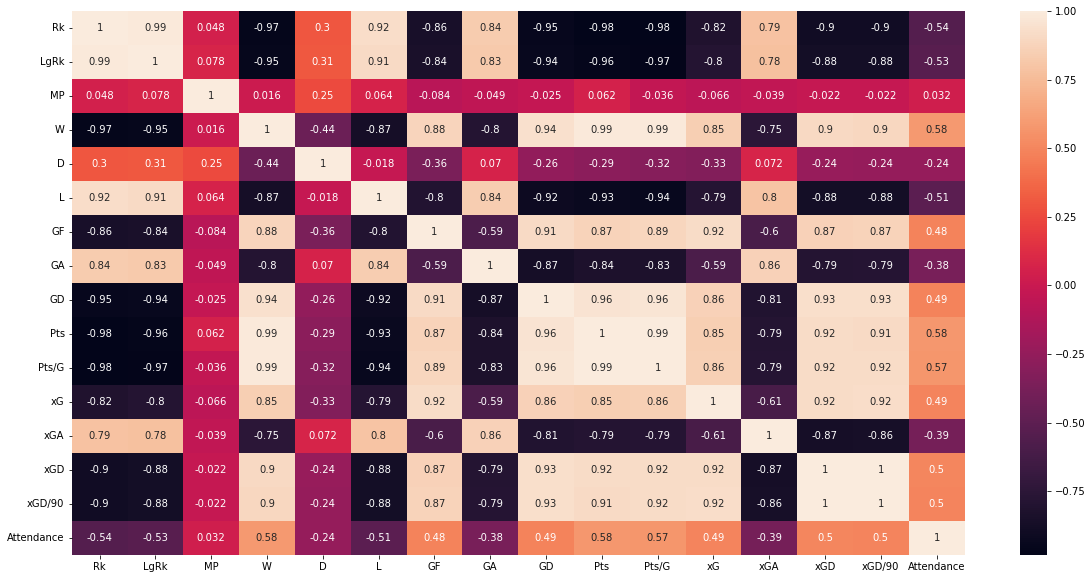

In [8]:

fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(lligues.corr(), annot=True, ax=ax)
plt.show()


Veiem que el grau mes gran de correlació (color mes clar) seria a mes partits guanyats (W), mes punts(Pts) o punts(Pts/G) amb 0,99
També en a més (Pts) punts menys (Rk) (perque el nro de ranking sera menor) amb -0,98

Un dels parametres que es fa servir mes avui dia es 
*“expected goals” (xG)* o gols esperats, que ens indica la probabilitat de que un xut
acabi en un gol. Per tant si disposem d'aquest valor
durant el partido i al final d'ell (xGD/90), podem comparar-lo amb els gols
marcats realment i determinar o analitzar millor com ha estat el partit.

### 1.2 Selecciono atribut i defineixo Hipòtesi: ###

Vull Mirar si la distribució de punts guanyats per equip a Itàlia es semblant a la de punts guanyats a Espanya.Per tant faig les seguents hipòtesis:

- Hipòtesi nul.la = Les mitjanes són iguals i no hi ha diferència entre les dues mostres. 

- Hipòtesi alternativa = Les mitjanes són diferents, hi ha una diferència significativa entre les dues mostres. 

- Alpha = Sostre 0.05 (5%)

Valor p: Probabilitat d’obtenir resultats de mostres per casualitat(H0 Hip. nul.la) com mes petit, mes evidencia que no son per casualitat (H1 Hip. Alternativa) Aquest valor p representa la probabilitat de trobar una diferència igual o més extrema que l'observada en les dades, suposant que la hipòtesi nul·la sigui certa.

Si el valor p es >0.05,  (p < alfa), puc rebutjar la hipòtesi nul·la.  Si els p-valors són iguals o superiors al nivell de significació (p ≥ alfa), no puc rebutjar la hipòtesi nul·la.


In [34]:
#Vull Mirar si la distribució de punts guanyats per Italia i  punts guanyats per Espanya son distribuides normalment 
#defineixo la funció amb shapiro
# Dataframe per Italia 
ita_data = lligues.loc[lligues['Country'] == 'ITA']

# Dataframe per Espanya
esp_data = lligues.loc[lligues['Country'] == 'ESP']

def check_normality(data):
    test_stat_normality, p_value_normality = stats.shapiro(data)
    print("p value: %.6f" % p_value_normality)
    if p_value_normality < 0.05:
        print("Rebutja H0 hipòtesi nul·la: Les dades no es distribueixen normalment")
    else:
        print("H0 hipòtesi nul·la. Dades normalment distribuïdes")

check_normality(ita_data['Pts'])
check_normality(esp_data['Pts'])

p value: 0.279550
H0 hipòtesi nul·la. Dades normalment distribuïdes
p value: 0.095991
H0 hipòtesi nul·la. Dades normalment distribuïdes


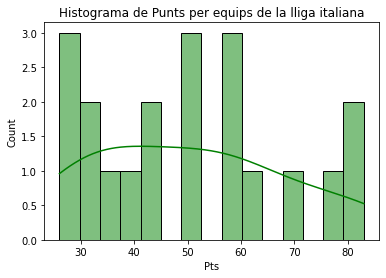

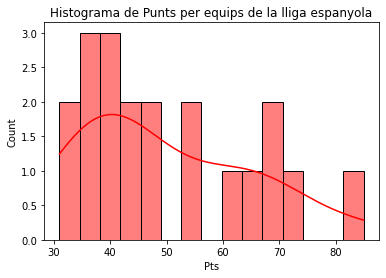

In [35]:
## Faig un histograma amb els partits jugats per veure la seva distribució 


# Histograma amb una columna de dades
sns.histplot(data=ita_data, x='Pts', bins=15, color='green', kde=True)
plt.title('Histograma de Punts per equips de la lliga italiana')
plt.show()

# Histograma amb groupby de la columna Country
sns.histplot(data=esp_data, x='Pts', bins=15, color='red', kde=True)
plt.title('Histograma de Punts per equips de la lliga espanyola')
plt.show()


Comprovo mitges i variances per decidir quin test fer

In [10]:
esp_data['Pts'].mean()

50.05

In [11]:
ita_data['Pts'].mean()

50.45

In [12]:
esp_data['Pts'].var()

234.26052631578952

In [13]:
ita_data['Pts'].var()

319.4184210526316

Comprovo si hi han outliers o no amb un violinplot:


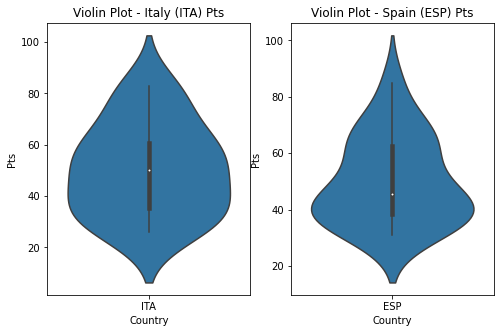

In [14]:
# Creo 2 gràfics amb 1 fila i 2 columnes
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# Creo violin plot per Italia 
sns.violinplot(data=ita_data, x='Country', y='Pts', ax=axes[0], showfliers=True)
axes[0].set_title('Violin Plot - Italy (ITA) Pts')

# Creo violin plot per Espanya
sns.violinplot(data=esp_data, x='Country', y='Pts', ax=axes[1], showfliers=True)
axes[1].set_title('Violin Plot - Spain (ESP) Pts')

plt.show()

### 1.3 Selecciono test segons les proves fetes: ###
En tots dos casos no hi han outliers. 
Com les mitjanes de dues mostres són molt semblants, però les variances són diferents i les mostres no segueixen una distribució gaussiana, utilitzo el test de Welch (també conegut com a t-test no igual de Welch o t-test no paramètric)

In [72]:
import numpy as np
from scipy import stats
import pandas as pd

# Executa el test estadístic t-test
t_statistic, p_value = stats.ttest_ind(ita_data['Pts'], esp_data['Pts'])

# Comparo el p-valor amb l'alfa establert

alpha = 0.05     
if p_value < alpha:
    print("Rebutja la hipòtesi nul·la: hi ha una diferència significativa entre les dos mostres")
else:
    print("No puc rebutjar la hipòtesi nul·la, molt probablement tenen la mateixa distribució")
      
print("El p-valor és:", p_value)
 


No puc rebutjar la hipòtesi nul·la, molt probablement tenen la mateixa distribució
El p-valor és: 0.939799510996866


### 1.4 Conclusió  ###
La distribució de punts guanyats per equip a Itàlia es semblant a la de punts guanyats per equip a Espanya.

- # Exercici 2


Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

### 2.1 Selecciono atributs i defineixo Hipòtesi: ###

Vull Mirar si la distribució de gols esperats normalment confirmen els gols a favor que te realment un equip.
Per tant faig les seguents hipòtesis:

- Hipòtesi nul.la = Les variances són iguals i no hi ha diferència entre les dues mostres. 

- Hipòtesi alternativa = Les variances són diferents, hi ha una diferència significativa entre les dues mostres. 

- Alpha = Sostre 0.05 (5%)

Valor p: Probabilitat d’obtenir resultats de mostres per casualitat(H0 Hip. nul.la) com mes petit, mes evidencia que no son per casualitat (H1 Hip. Alternativa) Aquest valor p representa la probabilitat de trobar una diferència igual o més extrema que l'observada en les dades, suposant que la hipòtesi nul·la sigui certa.

Si els valors p d'aquestes 2 mostres es <0.05, puc rebutjar la hipòtesi nul·la.  Si els p-valors són iguals o superiors al nivell de significació (p ≥ 0.05 alfa), no puc rebutjar la hipòtesi nul·la.


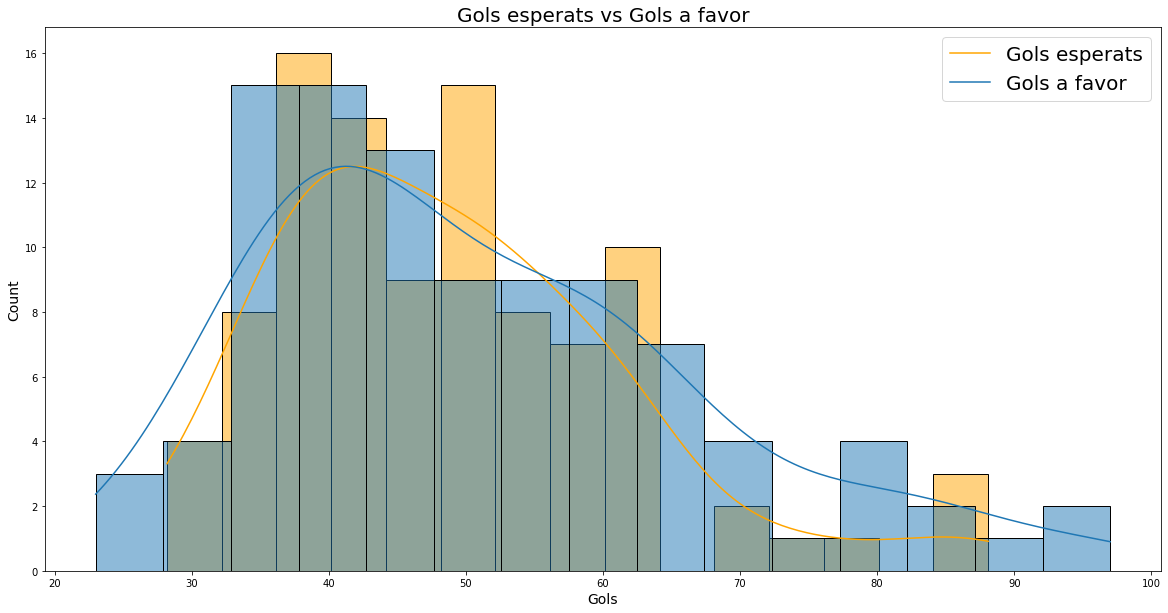

In [75]:
## Faig un histograma amb els gols esperats xG i els gols a favor per veure les seves distribucions

plt.figure(figsize=(20, 10))
sns.histplot(data=lligues, x='xG', bins=15, color='orange', kde= True)
sns.histplot(data=lligues, x='GF', bins=15, kde= True)
plt.xlabel("Gols", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Gols esperats vs Gols a favor", fontsize=20)
plt.legend(['Gols esperats', 'Gols a favor'], fontsize=20)

Amb l'histograma veiem una distribució força semblant però veiem que no es distribueixen normalment.

In [76]:
#Vull Mirar amb el test Shapiro si la distribució de Gols a favor i la distribució de Gols esperats son distribuides normalment 
#amb la funció que hem definit en l'exercici anterior amb Shapiro

check_normality(lligues['xG'])
check_normality(lligues['GF'])

p value: 0.000231
Rebutja H0 hipòtesi nul·la: Les dades no es distribueixen normalment
p value: 0.000356
Rebutja H0 hipòtesi nul·la: Les dades no es distribueixen normalment


Tant la distribució de gols a favor i la de gols esperats NO es distribueixen normalment

In [77]:
## Defineixo la funcio per comprovar la variança amb Levene’s test  

def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Rebutgem Hipòtesi nul.la >> Les variances de les mostres son diferents.")
    else:
        print("No podem rebutjar hipòtesi nul.la >> Les variances de les mostres son igual.")
check_variance_homogeneity(lligues['xG'], lligues['GF'])

p value:0.0290
Rebutgem Hipòtesi nul.la >> Les variances de les mostres son diferents.


Miro si hi ha outliers en aquestes dues mostres per veure quin test aplico:



<function matplotlib.pyplot.show(close=None, block=None)>

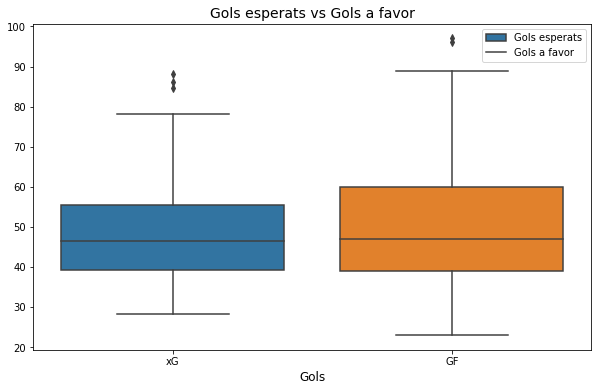

In [78]:
# Creo 2 gràfics amb boxplot

plt.figure(figsize= (10,6))

ax= sns.boxplot(data=lligues[['xG', 'GF']], orient="v")

plt.legend(loc=1, fancybox = True, fontsize='medium', 
           labels=['Gols esperats', 'Gols a favor'])

plt.xlabel('Gols', fontsize=12)
plt.title("Gols esperats vs Gols a favor", fontsize=14)

plt.show



### 2.2 Selecciono test segons les proves fetes: ###
No es distribueix normalment i hi ha outliers per tant aplico un robust

In [79]:
from scipy.stats import mannwhitneyu


# Aplico el test de Mann-Whitney U
statistic, p_value = mannwhitneyu(lligues['xG'], lligues['GF'], alternative='two-sided')
print(f" Mann–Whitney U Test: statistic={stat:.4f}, p-value={p_value:.4f}")
# Compara el p-valor amb l'alfa establert
alpha = 0.05
if p_value < alpha:
    print("Rebutja la hipòtesi nul·la: hi ha una diferència significativa entre les dues mostres")
else:
    print("No podem rebutjar la hipòtesi nul·la: no hi ha prou evidències de diferència significativa")
#En aquest exemple, s'utilitza la funció mannwhitneyu del mòdul scipy.stats per calcular el valor estadístic i el p-valor del test de Mann-Whitney U entre les columnes 'xG' i 'GF'. 
#L'opció alternative='two-sided' especifica que estàs interessat en una prova de dues cues (diferència significativa en qualsevol direcció). 
# Després, es compara el p-valor amb l'alfa establert (en aquest cas, 0.05) per determinar si es rebutja o no la hipòtesi nul·la.


 Mann–Whitney U Test: statistic=4572.5000, p-value=0.5641
No podem rebutjar la hipòtesi nul·la: no hi ha prou evidències de diferència significativa


### 2.3 Conclusió  ###
P-value 0,5641. Tot i que les variances son diferents, podem dir per el test i per la gràfica que els gols esperats d'un equip, son un bon indicador dels gols a favor que farà un equip, ja que no hi ha prou evidencia de diferencia significativa per rebutjar la hipòtesi nul.la.

- ## Exercici 3


Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

### 3.1 Selecciono atributs i defineixo Hipòtesi: ###

Vull Mirar si el nro de partits guanyats x equip a Espanya, Itàlia i Alemanya son semblants . Primer miro si  les distribucions son semblants gràficament, si son distribucions normals i si les variàncies son semblants.

Per tant faig les seguents hipòtesis:

- Hipòtesi nul.la = Les variances són iguals i no hi ha diferència entre les mostres. 

- Hipòtesi alternativa = Les variances són diferents, hi ha una diferència significativa entre les mostres. 

- Alpha = Sostre 0.05 (5%)


Si els valors p d'aquestes 2 mostres es <0.05, puc rebutjar la hipòtesi nul·la.  Si els p-valors són iguals o superiors al nivell de significació (p ≥ 0.05 alfa), no puc rebutjar la hipòtesi nul·la.


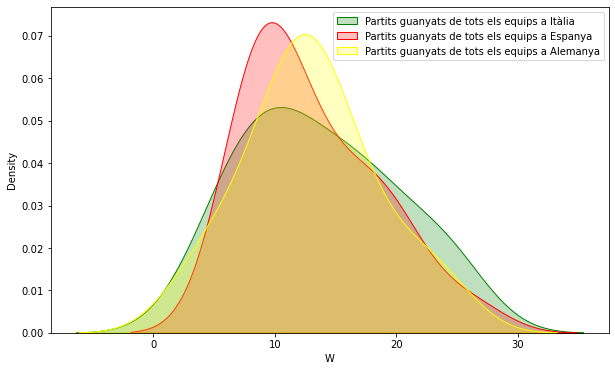

In [120]:
ger_data = lligues.loc[lligues['Country'] == 'GER']
plt.figure(figsize= (10,6))
sns.kdeplot(ita_data['W'], label= 'Partits guanyats de tots els equips a Itàlia', color= 'green', fill = True)
sns.kdeplot(esp_data['W'], label= 'Partits guanyats de tots els equips a Espanya', color= 'red', fill = True)
sns.kdeplot(ger_data['W'], label= 'Partits guanyats de tots els equips a Alemanya', color= 'yellow', fill = True)
plt.legend()
plt.show()

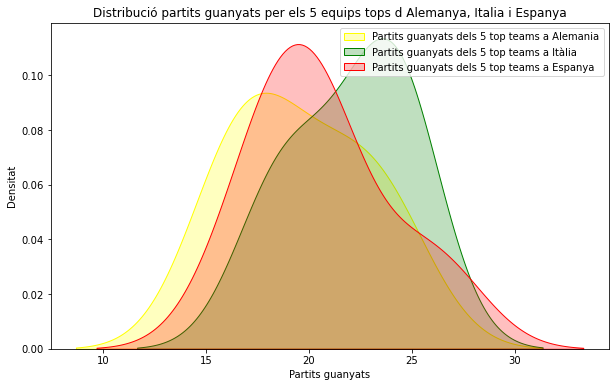

3     24
8     22
12    19
22    17
25    16
Name: W, dtype: int64

In [126]:
#### Filtro les dades pels equips amb el ranking més alt de cada país

ger_top_5 = ger_data.nsmallest(5, 'Rk')
ita_top_5 = ita_data.nsmallest(5, 'Rk')
esp_top_5 = esp_data.nsmallest(5, 'Rk')
plt.figure(figsize= (10,6))
sns.kdeplot(ger_top_5['W'], label='Partits guanyats dels 5 top teams a Alemania', color='yellow', fill=True)
sns.kdeplot(ita_top_5['W'], label='Partits guanyats dels 5 top teams a Itàlia', color='green', fill=True)
sns.kdeplot(esp_top_5['W'], label='Partits guanyats dels 5 top teams a Espanya', color='red', fill=True)

plt.legend()
plt.xlabel('Partits guanyats')
plt.ylabel('Densitat')
plt.title('Distribució partits guanyats per els 5 equips tops d Alemanya, Italia i Espanya')
plt.show()
ger_top_5['W']

Sembla que les distribucions son semblants, tot i que la de Itàlia te una desviació mes gran cap a la dreta. 
Per comprovar-ho miro la normalitat de cada variable i les variances.

In [122]:
#Comprovo la normalitat: 
check_normality(ger_top_5['W'])
check_normality(ita_top_5['W'])
check_normality(esp_top_5['W'])

p value: 0.677449
H0 hipòtesi nul·la. Dades normalment distribuïdes
p value: 0.584579
H0 hipòtesi nul·la. Dades normalment distribuïdes
p value: 0.559671
H0 hipòtesi nul·la. Dades normalment distribuïdes


In [123]:
## Comprovo variança dels 3 atributs:
stat, pvalue_levene= stats.levene(ger_top_5['W'], ita_top_5['W'],esp_top_5['W'])
print("p value:%.4f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Rebutja hipotesi nul.la >> Les variances de les 3 mostres son diferents.")
else:
    print("No rebutja hipotesi nul.la  >> Les variances de les 3 mostres son iguals.")

p value:0.9393
No rebutja hipotesi nul.la  >> Les variances de les 3 mostres son iguals.


### 3.2 Selecciono test segons les proves fetes: ### 
Es distribueixen normalment, son gausianes i les variances son iguals per tant puc aplicar una standarització amb 

el Shapiro Wilk Test per les 3 variables en ambdos casos.

In [130]:
# Realitzar el test de Shapiro-Wilk per a les 3 variables
_, valorp1 = stats.shapiro(ita_data['W'])
_, valorp2 = stats.shapiro(esp_data['W'])
_, valorp3 = stats.shapiro(ger_data['W'])

# Compara els p-valors amb l'alfa establert
alpha = 0.05

if valorp1 < alpha:
    print("Els partits guanyats per els equips d' Italia no segueixen una distribució normal")
else:
    print("Els partits guanyats per els equips d' Italia segueixen una distribució normal")
if valorp2 < alpha:
    print("Els partits guanyats per els equips d' Espanya no segueixen una distribució normal")
else:
    print("Els partits guanyats per els equips d' Espanya segueixen una distribució normal")

if valorp3 < alpha:
    print("Els partits guanyats per els equips d' Alemania no segueixen una distribució normal")
else:
    print("Els partits guanyats per els equips d' Alemania segueixen una distribució normal")

Els partits guanyats per els equips d' Italia segueixen una distribució normal
Els partits guanyats per els equips d' Espanya segueixen una distribució normal
Els partits guanyats per els equips d' Alemania segueixen una distribució normal


In [131]:
# Realitzar el test de Shapiro-Wilk per a les 3 variables
_, valorp1 = stats.shapiro(esp_top_5['W'])
_, valorp2 = stats.shapiro(ita_top_5['W'])
_, valorp3 = stats.shapiro(ger_top_5['W'])

# Compara els p-valors amb l'alfa establert
alpha = 0.05

if valorp1 < alpha:
    print("Els partits guanyats per els top5 equips d' Espanya no segueixen una distribució normal")
else:
    print("Els partits guanyats per els top5 equips d' Espanya segueixen una distribució normal")

if valorp2 < alpha:
    print("Els partits guanyats per els top5 equips d' Itàlia no segueixen una distribució normal")
else:
    print("Els partits guanyats per els top5 equips d' Itàlia segueixen una distribució normal")

if valorp3 < alpha:
    print("Els partits guanyats per els top5 equips d' Alemània no segueixen una distribució normal")
else:
    print("Els partits guanyats per els top5 equips d' Alemània  segueixen una distribució normal")

Els partits guanyats per els top5 equips d' Espanya segueixen una distribució normal
Els partits guanyats per els top5 equips d' Itàlia segueixen una distribució normal
Els partits guanyats per els top5 equips d' Alemània  segueixen una distribució normal
